# Install
On a fresh Python 3.10 environment (Jypiter Notebook, conda and pip already installed!)

> pip install pyometiff
> 
> pip install pylibCZIrw
> 
> conda install conda-forge::matplotlib
> 
> conda install -c conda-forge stackview
> 
> conda install -c conda-forge xmltodict

In [3]:
#The different import
import pyometiff
import xmltodict
from pylibCZIrw import czi as pyczi
import numpy as np
import matplotlib.pyplot as plt
import os
import pprint
import tifffile
import stackview

# Opening an image
 Let's start with an easy task: opening an image. Nothing difficult, right?

 Well... It is easy 😅! Thanks to <code>tifffile</code>. This library is mainly used to read and write tiff image file. The documentation is -> [here](https://pypi.org/project/tifffile/).

 When looking at the documentation, the one function we are interested in is <code>tifffile.imread</code>, and this take as argument a string or a Path, and will return an image with the format of an array. More on this later!

 First, let's open the image: <code>tifffile.imread('/path/to/your/image.ome.tiff')</code>

In [5]:
# Your own code here
filepath = r'D:\DATA\Simon\Python_imaging_images\10x_confocal_1c_2d.ome.tiff'

tifffile.imread(filepath)

array([[17757, 13944, 14051, ..., 16074, 12261,  9871],
       [16711, 13257, 11867, ...,  9922,  9287,  8062],
       [11756, 18680, 13806, ..., 10113,  9051,  7162],
       ...,
       [12852, 18706, 14779, ...,  9085,  3152,  7596],
       [19474, 18997, 18411, ...,  7647,  4576,  5743],
       [17671, 15636, 19051, ...,  6904,  6241,  6714]], dtype=uint16)

# Numbers
An image is just a serie of number, organized in a matrix. In this case, this image is a 2d grayscale image. The value of each pixel is store as a number, in this case stored on a 16 bit. In Python, this kind of matrix are called 'array', and the most commun one in image analysis is the numpy array (NUMerical PYthon). It is an object, and you can access a lot of its properties, such as the shape of the array, each axis and [more](https://numpy.org/doc/stable/user/absolute_beginners.html).

So, going back to the code:
> <code>img = tifffile.imread(filepath)
> 
> <code>print(img.shape)

Will give you the number of pixel on each dimension.

In [3]:
# Your own code here

img = tifffile.imread(filepath)

print(img.shape)

(360, 360)


# Number as an image
Of course, even if this is a matrix of numbers, an image is made to be **display**! We can display it in the NoteBook with the matplotlib library, and more speciffically with the [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) module. This module is most of the time used to plot graphs, but it has a image part as well!

Let's not make anything fancy here, pyplot has been imported as <code>plt</code> in the import section, and we can call the <code>plt.imshow</code> with the image as the main argument.

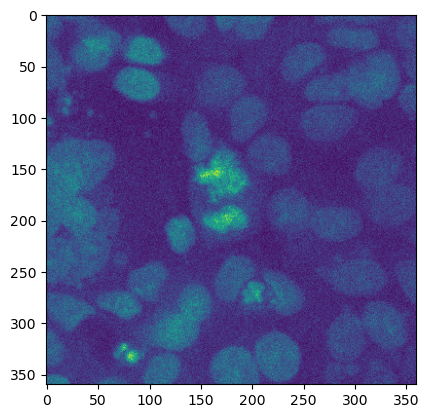

In [4]:
# Your own code here

plt.imshow(img)

# LUT, what is it?
You may have realized that even if the image that we give to <code>plt</code> is a monochromatic (one color) image, we got some color in there! By default, pyplot is applying a LUT, also called <code>colormap</code>, that is mapping a specific pixel value to a color. There is a lot of colormap available in pyplot, you have the list [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html). It is made possible with the argument <code>cmap</code>, that is taking a string ('Greens' or 'coolwarm' for example). By default, pyplot is using the 'viridis' colormap.

A *good* colormap/LUT is one that allow you to see **and** show the signal/object of interest

It is also possible to beautify the graph itself (removing axis, adding a title, adding an interpolation for the display, changing the figure size)... But let's not enter this rabbit hole, just knowing that it is possible is enough. **For now.**

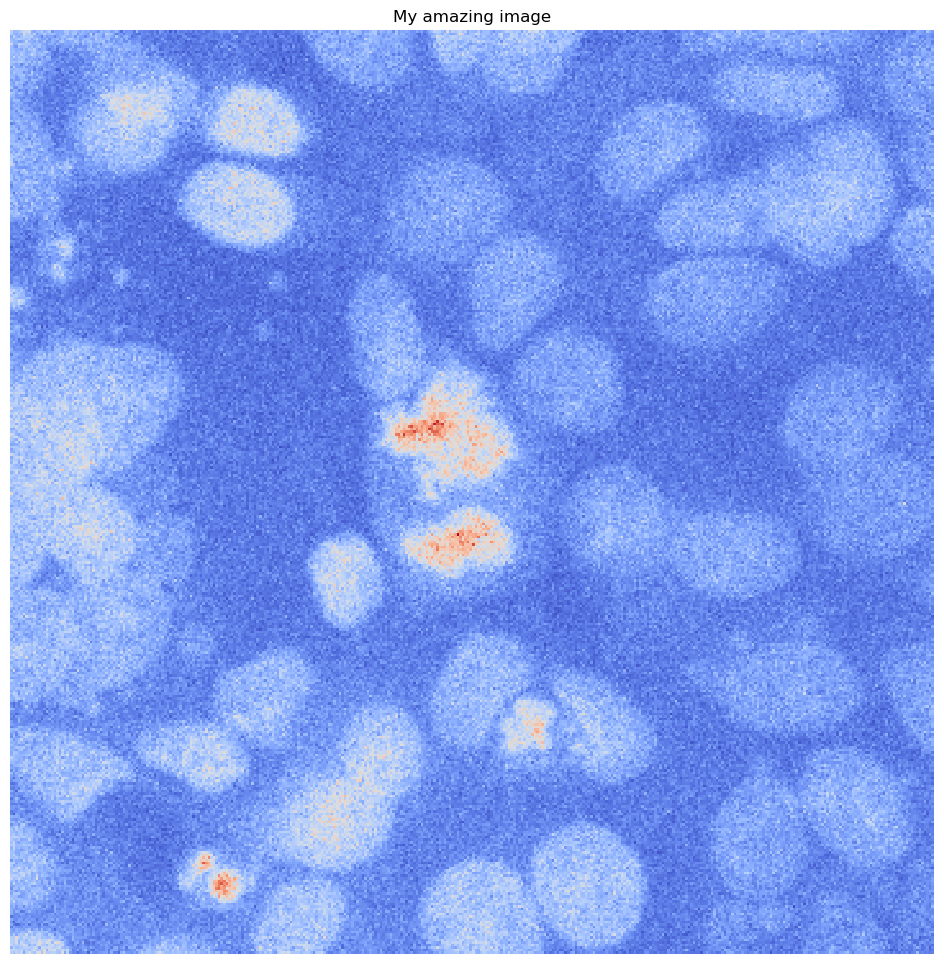

In [5]:
# Your own code here
plt.figure(figsize=(12,12))
plt.imshow(img, cmap='coolwarm', interpolation='none')
plt.axis('off')
plt.title('My amazing image')
plt.show()

# What is an ome-tif?
> The OME-TIFF format was created to maximize the respective strengths of OME-XML and TIFF. It takes advantage of the rich metadata defined in OME-XML while retaining the pixels in multi-page TIFF format for compatibility with many more applications.
>
> -- <cite>https://docs.openmicroscopy.org/ome-model/5.6.3/ome-tiff/</cite>

You can found the specification [here](https://docs.openmicroscopy.org/ome-model/5.6.3/ome-tiff/specification.html).

But the main point is that in the metadata, some parameters needs to be store with a specific name.

We can open the image with the <code>OMETIFFReader</code> function from <code>pyometiff</code>. You can found the example [here](https://github.com/filippocastelli/pyometiff/tree/main) on how to read (and write) an ome.tiff image.

In this case, we need to initialize our object, the <code>OMETIFFReader</code> with the location of our file (a string or a Path). Then on this object, we can simply call the <code>read</code> function, that will read the image itself (still as an array), the metadata and the metadata as a xml file. It will then return these three objects, that you need to prepare the recipient for each of them (three variables name, separated with a <code>,</code>).

In [6]:
#your own code here
reader = pyometiff.OMETIFFReader(filepath)
img_array, metadata, xml_metadata = reader.read()

print(metadata)

{'Directory': 'D:\\DATA\\Simon\\Python_imaging_images', 'Filename': '10x_confocal_1c_2d.ome.tiff', 'Extension': 'ome.tiff', 'ImageType': 'ometiff', 'TotalSeries': 1, 'SizeX': 360, 'SizeY': 360, 'SizeZ': 1, 'SizeC': 1, 'SizeT': 1, 'SizeS': 1, 'SizeB': 1, 'SizeM': 1, 'PhysicalSizeX': 0.32956945501412394, 'PhysicalSizeXUnit': 'µm', 'PhysicalSizeY': 0.32956945501412394, 'PhysicalSizeYUnit': 'µm', 'PhysicalSizeZ': 1.0, 'PhysicalSizeZUnit': 'µm', 'Sizes BF': [1, 1, 1, 1, 360, 360], 'DimOrder BF': 'XYCZT', 'DimOrder BF Array': 'TZCYX', 'ObjNA': '0.3', 'ObjMag': '10.0', 'ObjID': 'Objective:1', 'DetectorModel': '', 'DetectorID': 'Detector:MA-Pmt1', 'DetectorType': 'Other', 'InstrumentID': 'Instrument:0', 'MicroscopeType': 'Inverted', 'Channels': {'Ch1': {'Name': 'Ch1', 'ID': 'Channel:0:0', 'SamplesPerPixel': 1, 'Fluor': 'Dye1', 'Color': '13434879'}}, 'ImageIDs': [0], 'AcquisitionDate': '2024-08-20T11:17:50.162', 'Name': '10x_confocal_1c_2d.czi #1', 'TimeIncrement': 0.0, 'TimeIncrementUnit': 's'

## Beautify your print
In some cases, printing something does not give anything readable. <code>pprint.pprint()</code> work as <code>print</code>, but will output text in a more human friendly form. Feel free to try!

In [7]:
#your own code here
pprint.pprint(metadata)

{'AcquisitionDate': '2024-08-20T11:17:50.162',
 'Channels': {'Ch1': {'Color': '13434879',
                      'Fluor': 'Dye1',
                      'ID': 'Channel:0:0',
                      'Name': 'Ch1',
                      'SamplesPerPixel': 1}},
 'DetectorID': 'Detector:MA-Pmt1',
 'DetectorModel': '',
 'DetectorType': 'Other',
 'DimOrder': 'TZCYX',
 'DimOrder BF': 'XYCZT',
 'DimOrder BF Array': 'TZCYX',
 'Directory': 'D:\\DATA\\Simon\\Python_imaging_images',
 'Extension': 'ome.tiff',
 'Filename': '10x_confocal_1c_2d.ome.tiff',
 'ImageIDs': [0],
 'ImageType': 'ometiff',
 'InstrumentID': 'Instrument:0',
 'MicroscopeType': 'Inverted',
 'Name': '10x_confocal_1c_2d.czi #1',
 'ObjID': 'Objective:1',
 'ObjMag': '10.0',
 'ObjNA': '0.3',
 'PhysicalSizeX': 0.32956945501412394,
 'PhysicalSizeXUnit': 'µm',
 'PhysicalSizeY': 0.32956945501412394,
 'PhysicalSizeYUnit': 'µm',
 'PhysicalSizeZ': 1.0,
 'PhysicalSizeZUnit': 'µm',
 'SizeB': 1,
 'SizeC': 1,
 'SizeM': 1,
 'SizeS': 1,
 'SizeT': 1,
 '

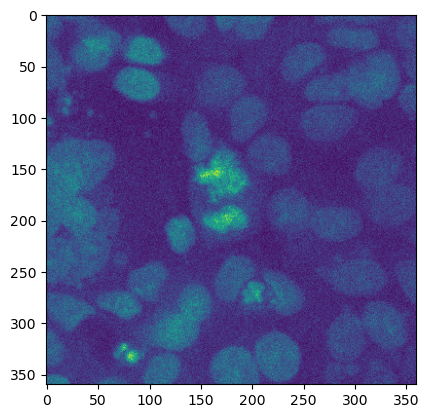

In [8]:
#We can also have a look at the image
#you own code
plt.imshow(img_array)

# Metadata for microscopy

You can see in the above example that the OME metadata cover a lot of the acquisition setup and the most important part of a microscope image: the **pixel size** (PhysicalSizeX/Y/Z). Important other information to have is the acquisition date, the objective information, the image dimension as well as the information on each channel, most important when there are multi channel in the image!

Now, let's have a look at the raw metadata. OME-TIFF format will save only OME metadata, so we will need to go back to the original image. We can see in the <code>Name</code> part the original name of the image, which is the still the same, but the czi extension.

CZI stands for Carl Zeiss Image, an image acquired by a Zeiss microscope. Zeiss provide an API (Application Programming Interface) with binding in Python. The library is called <code>pylibCZIrw</code> (more information [here](https://github.com/ZEISS/pylibczirw/tree/main)).

Let's first open an image using <code>pylibCZIrw</code> (renamed <code>pyczi</code> for simplicity). The correct procedure (taken from the [zeiss notebook](https://github.com/ZEISS/pylibczirw/blob/main/doc/jupyter_notebooks/pylibCZIrw_4_1_0.ipynb) require to use another python keyword: <code>with</code>.

<code>with</code> (details [here](https://docs.python.org/3/whatsnew/2.6.html#pep-343-the-with-statement)) is mainly used to open a file, then close it once outside the with block, even if there are some error or exception raised. This allows for a more cleanup code.

<code>pyczi</code> function used to open a czi file is <code>open_czi</code>. We also want to all this file with a short name with the keyword <code>as</code>. This file is an object (a czi one) that have multiple functions bound to it. We can get the image metadata with the <code>.raw_metadata</code> function.

>[WARNING!]
>The raw metadata are **big**. Around 10 times bigger than the OME-XML metadata. The metadata organisation is also complicated. This is because the zeiss metadata store **every setting** of the microscope. This is to enable the option to reuse the settings of a previous image.
>
>However, in our case, we *just* want to get the pixel size. It should not be too difficult, right? ... **Right?**

Let's first pretty print the first 1000 or so characters of the metadata to have a look at it.


In [9]:
# your own code here
filepath = r'D:\DATA\Simon\Python_imaging_images\10x_confocal_1c_2d.czi'
with pyczi.open_czi(filepath) as czidoc:
    md_xml = czidoc.raw_metadata
    pprint.pp(md_xml[:2000])
    

('<?xml version="1.0"?>\n'
 '<ImageDocument>\n'
 ' <Metadata>\n'
 '  <Experiment Version="1.2">\n'
 '   '
 '<RunMode>OptimizeBeforePerformEnabled,ValidateAndAdaptBeforePerformEnabled,TimeStitchLoopedBlockEnabled</RunMode>\n'
 '   <BeforeHardwareSetting>Before Exp [DAPI] Smart</BeforeHardwareSetting>\n'
 '   <AfterHardwareSetting>After Exp [DAPI] Smart</AfterHardwareSetting>\n'
 '   <ExperimentBlockIndex>0</ExperimentBlockIndex>\n'
 '   <IsSegmented>false</IsSegmented>\n'
 '   <IsStandardMode>true</IsStandardMode>\n'
 '   <ImageTransferMode>MemoryMappedAndFileStream</ImageTransferMode>\n'
 '   <AutoSave IsActivated="false" EnableSingleFileSave="false">\n'
 '    <StorageFolder>D:\\zeiss\\Pictures</StorageFolder>\n'
 '    <Name>New</Name>\n'
 '    <IsAutoSubFolder>true</IsAutoSubFolder>\n'
 '    <AlwaysAddFileIndex>true</AlwaysAddFileIndex>\n'
 '    <IsAutoSubFolderExternal>true</IsAutoSubFolderExternal>\n'
 '    <IsClosedOnCompletion>false</IsClosedOnCompletion>\n'
 '    <InitialIndex>1<

Since variable can be store in the memory in a <code>with</code> block, we can access the raw metadata if stored in a variable. As you may have realized, the metadata is an XML file, which is difficult to handle (but not impossible, with the correct [library](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)). In our case, we will use the <code>xmltodict</code> library to translate the xml text in a python dictionary. We just need to <code>.parse()</code> the XMl metadata!

It still has a **lot** of information, so if you want to pretty print it, I recommand using the <code>depth</code> argument to avoid printing everything! (a value of 3 is good!)

In [10]:
#your code here
md_dict = xmltodict.parse(md_xml)

pprint.pp(md_dict, depth=3)

{'ImageDocument': {'Metadata': {'Experiment': {...},
                                'HardwareSetting': {...},
                                'CustomAttributes': None,
                                'Information': {...},
                                'Scaling': {...},
                                'DisplaySetting': {...},
                                'Layers': None}}}


Here, we are falling in a rabbit hole: which category can you found the pixel size? Or the objective magnification?

In addition, the naming of some variables may not be the most evident at a first glance...

Finally, this is a CZI file, but a LIF file (from leica) or a ND2 file (from Nikon) will have a name and/or location. If your file are simple (like this one) going through a ome.tiff conversion (that is using bioformat, not directly supported by python, but some effort are made [here](https://allencellmodeling.github.io/aicsimageio/))

However, for the next exercice, I want **you** to grab the pixel size. Here are some hints:

- It is store in "Scaling", "Items", "Distance" as a list
- The list contains a dictionary, which identify each dimension
- Use the autocompletion to avoid typing mistake (Tab to autcomplete and choose the correct option)
- To access a key in a dictionary: <code>dict['ImageDocument']</code>
- Be carefull of the unit and format!

In [11]:
#your code here
print("The 'Distance' structure")
pprint.pp(md_dict['ImageDocument']['Metadata']['Scaling']['Items']['Distance'])

pixelsizeX = float(md_dict['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][0]['Value']) * 1e6
pixelunitX = md_dict['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][0]['DefaultUnitFormat']
pixelsizeY = float(md_dict['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][1]['Value']) * 1e6
pixelunitY = md_dict['ImageDocument']['Metadata']['Scaling']['Items']['Distance'][1]['DefaultUnitFormat']

print()
print("On the X axis, the pixel size is of %s %s." % (round(pixelsizeX,3), pixelunitX))
print("On the Y axis, the pixel size is of %s %s." % (round(pixelsizeY,3), pixelunitY))

The 'Distance' structure
[{'@Id': 'X', 'Value': '3.2956945501412394E-07', 'DefaultUnitFormat': 'µm'},
 {'@Id': 'Y', 'Value': '3.2956945501412394E-07', 'DefaultUnitFormat': 'µm'}]

On the X axis, the pixel size is of 0.33 µm.
On the Y axis, the pixel size is of 0.33 µm.


# Open a CZI image
Opening the image is straightforward, specially for a 2D grayscale image. In the with block, just <code>.read()</code> the file in a variable. This will return an array that can then be quickly display using matplotlib.

(360, 360, 1)

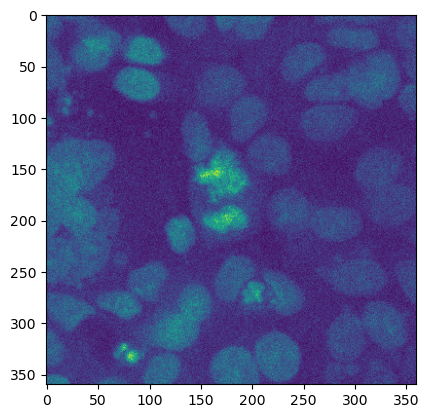

In [12]:
# Your code here


# Open a more complicated image
In the same folder, you should have another czi image named <code>40x_Confocal_2c_Zstackczi.czi</code>. This image is a dual channel Z-stack image of a dividing cell.

What we want this time is the pixel size of each dimension, **including the Z**, from the metadata, read the full data and explore the data.

You can reuse the code to extract the pixel size from the metadata, just need to add the Z dimension.

However, if you do <code>img = czidoc.read()</code> you will realize that it is opening only one image.


On the X axis, the pixel size is of 0.069 µm.
On the Y axis, the pixel size is of 0.069 µm.
On the Z axis, the pixel size is of 0.24 µm.

(512, 512, 1)


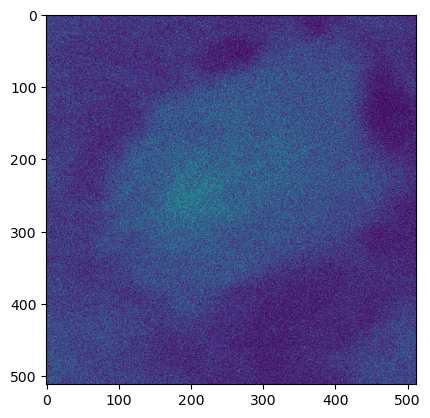

In [7]:
# your code here


# Open a more complicated image - step by step!

So we can open only one plane of one zstack at a time... In fact, even if you have **more** (time, tile, region...) the read function will always open one image. Even if this look *very* incovenient, it makes sense: you may not want to access the whole data, or some dataset may be so big that it cannot fit in the computer memory. So the read function take as parameter a <code>plane</code> argument, which is a dictionary in the form of dimension letter and plane number to load. Like:

> <code>plane = czidoc.read(plane={'T': t, 'Z': z, 'C': c})<code>

Where t, z and c are numbers positionning your plane of interest.

In our case, though, we want to open the full data. We can have access to the number of dimensions of the image with <code>czidoc.total_bounding_box</code>. It gives a starting point and an ending point value for each dimension. <code>czidoc.total_bounding_rectangle</code> can also give you the size of one plane.

So with the use of numpy, a double for loop (one for the channel 'C', and the other for the stack 'Z') we can read each plane of the image and store that in a multidimensional array.

Let's do it together step by step:

- get the total_bounding_box
    - should be something like that <code>{'T': (0, 1), 'Z': (0, 23), 'C': (0, 2), 'H': (0, 1), 'X': (0, 512), 'Y': (0, 512)}</code>
- then we want the number of dimension for each channel (maximum number, or better, the absolute number of the substraction between the last and first item)
    - require a list comprehension with dictionary. Check with Perplexity or hard code this part!
- then drop empty dimension (value of 1)
    - again a list dimension, and again you can hard code this part
- create an array of the correct size and type
    - you can get the pixel type with <code>czidoc.pixel_types</code> and hardcode it for now
    - using np.empty(shape, dtype) or np.zeros(shape, dtype) to setup the array
- loop through both the C and the Z
    - read the image data
    - assign it with slicing np_img[c,z] = img
    - you may need to check the dimension of everything - use print(img.shape) or other print statement at strategical location in the code to check some error


In [14]:
# your code here


Original bounding box
{'T': (0, 1), 'Z': (0, 23), 'C': (0, 2), 'H': (0, 1), 'X': (0, 512), 'Y': (0, 512)}
Process bounding box to get dimension
{'T': 1, 'Z': 23, 'C': 2, 'H': 1, 'X': 512, 'Y': 512}
Final image dimension
{'Z': 23, 'C': 2, 'X': 512, 'Y': 512}
Pixel type of the image
{0: 'Gray16', 1: 'Gray16'}
empty image shape is: (2, 23, 512, 512)
Average value of image is: 0.0
Average value of image is: 9334.049530029297


# Displaying large data

## Matplotlib

Let's first try using matplotlib, with the <code>plt.imshow()</code> function.

TypeError: Invalid shape (2, 23, 512, 512) for image data

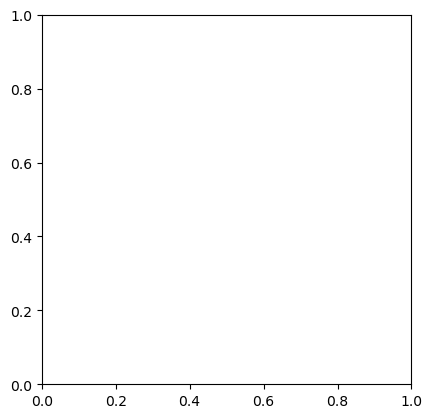

In [15]:
#try here!


It will throw you a <code>TypeError: Invalid shape (2, 23, 512, 512) for image data</code>.

This is one limitation of matplotlib. It can display 2D grayscale image withtout trouble, and even 2D RGB image, but higher than that is not possible.

You can resort on tricks, like making a Z-projection and splitting the channel, like in the following example.

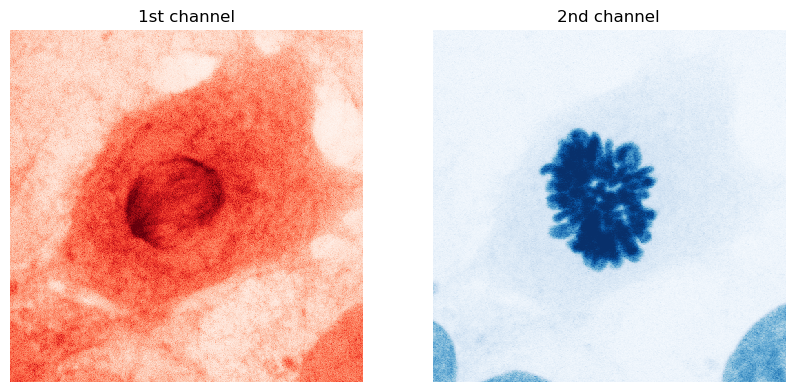

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].imshow(np.max(img_array, axis=1)[0], interpolation='none', cmap='Reds')
axs[0].set_title('1st channel')
axs[0].axis('off')
axs[1].imshow(np.max(img_array, axis=1)[1], interpolation='none', cmap='Blues')
axs[1].set_title('2nd channel')
axs[1].axis('off')

plt.show()

## Stackview
A more interesting way to expore you data is to do this interactively. [Stackview](https://github.com/haesleinhuepf/stackview) is an interactive tool for JypiterLab to see you data. You will explore it a little more with Rafael in the next session.

You can view and interact with stack image.

You can also see the different channel at the same time with their merge and change the Z.


In [16]:
stackview.slice(img_array[0], continuous_update=True)

In [25]:
stackview.side_by_side(img_array[0], img_array[1])

side_by_side


# Writing an OME-TIFF

And now we are ending with a conversion of our image to an .ome.tiff.

The <code>pyometiff</code> has a <code>OMETIFFWriter</code>. It takes at least 3 arguments:

- the output file path and name as one string or Path
- the image as an array (that we have from a previous step)
- the metadata as a dict
- in our case, giving the dimension order will also be required (we should be CZYX)

And finally with finish with <code>.write()</code> to write the file itself.


fpath=output_fpath,
    dimension_order=dimension_order,
    array=npy_array_data,
    metadata=metadata,
    explicit_tiffdata=False)


In [47]:
# try here!
              

# Checking the OME-TIFF

Better to check that we correctly wrote the file!

Let's open it with the <code>OMETIFFReader</code>, print the metadata and display one image!

Key not found: list index out of range
Key not found: list index out of range
key not found list index out of range
Key not found: list index out of range
{'Directory': 'D:\\DATA\\Simon\\Python_imaging_images',
 'Filename': '40x_Confocal_2c_Zstackczi.ome.tiff',
 'Extension': 'ome.tiff',
 'ImageType': 'ometiff',
 'TotalSeries': 1,
 'SizeX': 512,
 'SizeY': 512,
 'SizeZ': 23,
 'SizeC': 2,
 'SizeT': 1,
 'SizeS': 1,
 'SizeB': 1,
 'SizeM': 1,
 'PhysicalSizeX': 0.06860688874514875,
 'PhysicalSizeXUnit': 'µm',
 'PhysicalSizeY': 0.06860688874514875,
 'PhysicalSizeYUnit': 'µm',
 'PhysicalSizeZ': 0.24,
 'PhysicalSizeZUnit': 'µm',
 'Sizes BF': [1, 1, 23, 2, 512, 512],
 'DimOrder BF': 'XYZCT',
 'DimOrder BF Array': 'TCZYX',
 'Channels': {'C:0': {'Name': 'C:0', 'ID': 'Channel:0:0', 'SamplesPerPixel': 1},
              'C:1': {'Name': 'C:1',
                      'ID': 'Channel:0:1',
                      'SamplesPerPixel': 1}},
 'ImageIDs': [0],
 'AcquisitionDate': '2024-10-02T15:38:02.396042',
 'Na

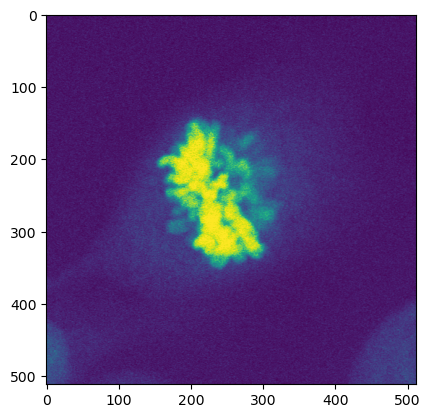

In [50]:
#Your code here


# Wrapping things

With this course, you got an overview of the beautifull world of property image opening and metadata management.

The OME project ([Open Microscopy Environment](https://www.openmicroscopy.org/)) is pushing towards an unified metadata format, and you can be part of it as well!

Do not hesistate if you have any question!